# Gini Coefficient example 
credit : https://www.kaggle.com/batzner/gini-coefficient-an-intuitive-explanation/notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate

# some example 
predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [3]:
# gini functions
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [4]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630


# Application to ML metric

In [6]:
# Sort the actual values by the predictions
data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)
print('orignal actuals',actual)
print('original predictions', predictions)

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
orignal actuals [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
original predictions [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]


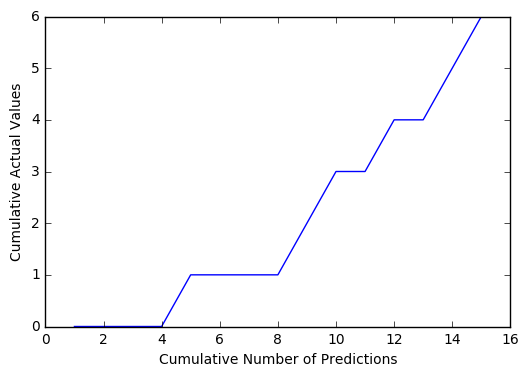

In [7]:
# sum up actual values (like summing up incomes in economic gini definition)
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

plt.plot(cumulative_index, cumulative_actual)
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')
plt.show()

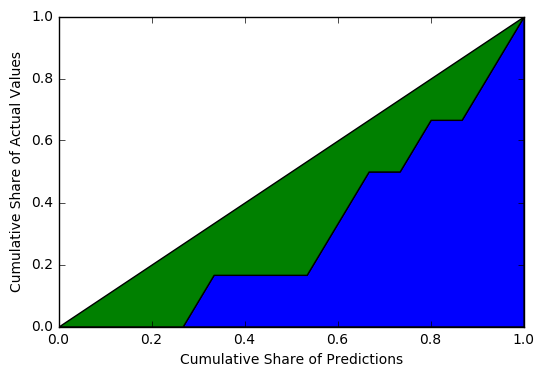

In [29]:
# sum up actual values (like summing up incomes in economic gini definition)
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

cumulative_actual_shares = cumulative_actual / sum(actual) # y
cumulative_index_shares = cumulative_index / len(predictions) # x 

# Add (0, 0) to the plot
x_values = [0] + list(cumulative_index_shares)
y_values = [0] + list(cumulative_actual_shares)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values)]

plt.stackplot(x_values, y_values, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

In [9]:
cumulative_actual_shares

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.16666667,
        0.16666667,  0.16666667,  0.16666667,  0.33333333,  0.5       ,
        0.5       ,  0.66666667,  0.66666667,  0.83333333,  1.        ])

In [10]:
# Now, we calculate the orange area by integrating the curve function:
fy = scipy.interpolate.interp1d(x_values, y_values)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
green_area = 0.5 - blue_area
print('Orange Area: %.3f' % green_area)

Orange Area: 0.189


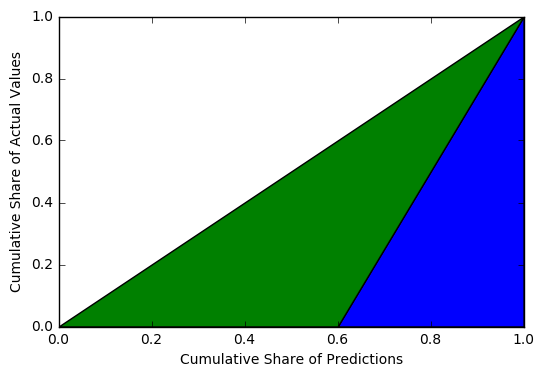

Orange Area: 0.300


In [24]:
# So, the orange area is equal to the Gini Coefficient calcualted above with the gini function. We can do the same using the actual values as predictions to get the maximum possible Gini Coefficient.
# note that sorted(actual) is different from sorted_actual. sorted(actual) are based solely on actual ascending while the latter is 
# based on actual sorted by prediction ascending
cumulative_actual_shares_perfect = np.cumsum(sorted(actual)) / sum(actual) # y?
y_values_perfect = [0] + list(cumulative_actual_shares_perfect)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values_perfect)]

plt.stackplot(x_values, y_values_perfect, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

# Integrate the the curve function
fy = scipy.interpolate.interp1d(x_values, y_values_perfect)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
green_area = 0.5 - blue_area
print('Green Area: %.3f' % green_area)

In [27]:
#Dividing both orange areas gives us the Normalized Gini Coefficient:

#0.189 / 0.3 = 0.630

# So...? 
Basically, to compute gini, we need 2 argument. The first is the value we need to do the cumulative sum (think of it as the cumulative sum of income.) 

But before that, we need to sort it based on something. This is where the second argument comes in. We need to sort argument 1 based on argument 2. 

In essence, first gini coefficient graph is based on actual value sorted by prediction. (lorenz curve: green area)
Second gini graph is based on actual value sorted by actual value. (lorenz curve: green area)

Now, we add a 45 degree line to both graph and compute area of green area. That is the gini index. 


Also, note that gini = 2*AUC - 1


In [ ]:
# in R 
predictions = data.frame(value = c(0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1))
actual = data.frame( value = c(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0))

library(MLmetrics)

Gini(p,a)
gini_normalized <- function(p,a){
  g1 <- Gini(p,a)
  g2 <- Gini(a,a)
  g3 <- g1/g2
  return(g3)
}

gini_normalized(predictions$value,actual$value)
